### Practica 4

Implementación de regresión polinomial con k-pliegues igual a 10

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import pickle
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator
import pandas as pd
from  sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
import os

Definición de clases para los kFold


In [2]:
class validation_set:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

In [3]:
class test_set:
    def __init__(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test


In [4]:
class data_set:
    def __init__(self, validation_set, test_set):
        self.validation_set = validation_set
        self.test_set = test_set

In [11]:
def create_csv(name_file, data, col_names, list_opt = False):
    new_data = data.tolist()

    with open(name_file, 'w', newline='') as f:
        if list_opt:
            new_new_data = [[i] for i in new_data]
        else:
            new_new_data = new_data
        # using csv.writer method from CSV package
        write = csv.writer(f)
        write.writerow(col_names)
        write.writerows(new_new_data)

In [17]:
def generate_folds(data, k):
    X_train = data[0]
    y_train = data[1]
    X_test = data[2]
    y_test = data[3]
    X_columns = data[4]
    y_columns = data[5]
    print('Validación Cruzada k =', k)
    validation_sets = []
    kf = KFold(n_splits = k)
    c = 0
    for train_index, test_index in kf.split(X_train):
        c = c + 1
        X_train_v, X_test_v = X_train[train_index], X_train[test_index]
        y_train_v, y_test_v = y_train[train_index], y_train[test_index]
        validation_sets.append(validation_set(X_train_v, y_train_v, X_test_v, y_test_v))
        create_csv(name_file ='./data validation test'+'/data_validation_train_k' + str(k)+ '_'+str(c)+'.csv', 
                    data = X_train_v, col_names = X_columns)
        create_csv(name_file = './data test' +'/data_test_k'+ str(k) + '_' + str(c) + '.csv', 
                    data = X_test_v, col_names = X_columns)
        create_csv(name_file = './target validation train'+'/target_validation_train_k' + str(k) + '_' + str(c) + '.csv', 
                    data = y_train_v, col_names = y_columns, list_opt = True)
        create_csv(name_file = './target test'+'/target_test_k'+str(k)+'_'+str(c)+'.csv', 
                    data = y_test_v, col_names = y_columns, list_opt = True)        
    my_test_set = test_set(X_test, y_test)
    my_data_set = data_set(validation_sets, my_test_set) 
    return (my_data_set)

In [5]:
def generate_train_test(file_name):
    df = pd.read_csv(file_name, sep = ',', engine = 'python')
    X = df.drop('medianHouseValue', axis = 1).values
    y = df['medianHouseValue'].values
    columns_names = list(df.columns)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False, random_state=0)
    X_columns = columns_names[:len(columns_names) - 1]
    y_columns = columns_names[len(columns_names) - 1:]
    return [X_train, y_train, X_test, y_test, X_columns, y_columns]

In [8]:
# Creamos los x_train y y_train
data = generate_train_test('./dataset/cal_housing.csv')

In [19]:
k = 10
new_data = generate_folds(data, k)
# guardamos en pickle 
dataset_file = open('./k'+str(k)+'/data_s'+str(k)+'.pkl','wb')
pickle.dump(new_data, dataset_file)
dataset_file.close()
print('Completo..')

Validación Cruzada k = 10
Completo..


In [16]:
create_csv(name_file="./data_test.csv", data= new_data.test_set.X_test, col_names= data[4])
create_csv(name_file="./target_test.csv", data = new_data.test_set.y_test, col_names= data[5], list_opt=True)

Ahora procederemos a crear los procedimientos para la regresión multiple

In [151]:
mse_list = []
r2_list = []

In [ ]:

def generate_polynomial(grade, x, y, color, i):
    polynomial_features= PolynomialFeatures(degree=grade)
    x_poly = polynomial_features.fit_transform(x)
    # x_poly = x
    # print ('\n x_poly', x_poly)
    
    # ~ #Modelo de regresión polinomial
    model_poly = LinearRegression()
    model_poly.fit(x_poly, y)
    y_poly_pred = model_poly.predict(x_poly)
    # print('y_poly_pred {}'.format(y_poly_pred))
    
    # ~ #Cálculo del error cuadrado medio y r2
    mse = mean_squared_error(y, y_poly_pred)
    r2 = r2_score(y, y_poly_pred)
    mse_list.append(mse)
    r2_list.append(r2)
    # return y_poly_pred
    
        #Ajustes para que la curva trazada se vea correctamente
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    # print (tuple(sorted_zip))
    x_sorted, y_poly_pred = zip(*sorted_zip)
    print(pd.DataFrame({'x': np.reshape(x_sorted,(1,-1))[0], 'Predicted': y_poly_pred}))

    # plt.text(x_sorted,y_poly_pred, 1, horizontalalignment='right')
    # plt.title('Regresión Polinomial')
    # plt.xlabel('X_poly')
    # plt.ylabel('y_poly_pred')
    # plt.plot(x_sorted, y_poly_pred, color='g')
    # sub = 221 + i
    plt.subplot(333)
    plt.title('Regresion polinomial')
    plt.plot(x_sorted,y_poly_pred, color = color, label= 'Regresión Polinomial')
    plt.legend()
    print ('\nRegresión polinomial grado 2\nmse: {} r2: {}'.format(mse, r2),'\n')

: 

iteracion:1
                  x             Predicted
0        households   [298698.5857690945]
1  housingMedianAge  [326641.14232464135]
2          latitude   [341865.4085738659]
3         longitude  [260417.95037750155]
4      medianIncome   [322429.7165721357]
5        population  [238633.30737495422]
6     totalBedrooms  [295521.52172639966]
7        totalRooms  [337417.35701680183]

Regresión polinomial grado 2
mse: 4003280978.105847 r2: 0.6975093696918291 

iteracion:1
                  x             Predicted
0        households  [243601.31408903934]
1  housingMedianAge    [366901.274945518]
2          latitude  [481649.28669579886]
3         longitude   [385007.8170182239]
4      medianIncome   [266110.9318510238]
5        population  [246951.41333960555]
6     totalBedrooms  [234393.53717360087]
7        totalRooms   [309007.7775630187]

Regresión polinomial grado 2
mse: 3748390367.716577 r2: 0.7023513332891056 

iteracion:1
                  x             Predicted
0        h

ValueError: num must be 1 <= num <= 4, not 5

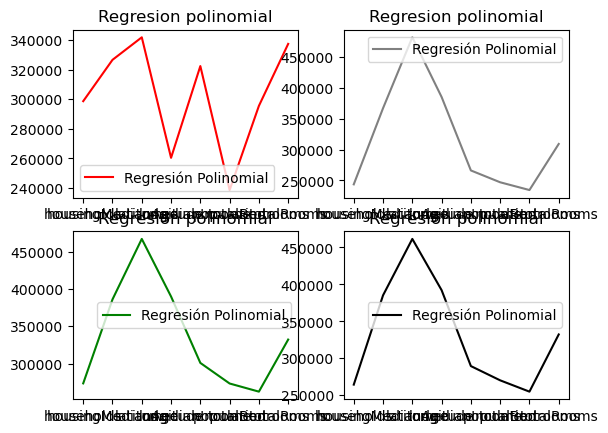

In [153]:

data_validation = os.listdir('./data validation test/')
target_validation = os.listdir('./target validation train/')
colores = ['red', 'gray', 'green', 'black', 'orange', 'teal', 'yellow', 'coral', 'palegreen', 'aqua', 'cyan']
# fig = plt.figure(figsize=(15,15))
# # fig.tight_layout()
# ax1 = fig.add_subplot(1, 2, 1)

for i in range(0, len(data_validation)):
    grade = 2
    print('iteracion:{}'.format(1))
    x = pd.read_csv('./data validation test/' + data_validation[i])
    y = pd.read_csv('./target validation train/' + target_validation[i])
    generate_polynomial(grade, x, y, colores[i], i)


In [131]:
len(data_validation)

10